# Steven Granaturov #
<br>

| Model                        | Depth = 1 | Depth = 3 | Depth = 6 | Depth = 9 | Depth = 12 | Depth = 15 | Depth = 18 |
| ---------------------------- | --------- | --------- | --------- | --------- | ---------- | ---------- | ---------- |
| Gini                         |  38.82%   |  62.81%   |  81.64%   |  89.04%   |  93.12%    |  93.70%    |  94.44%    |
| Entropy                      |  40.48%   |  67.07%   |  84.77%   |  91.25%   |  93.94%    |  94.60%    |  95.02%    |
| Gini (AdaBoostClassifier)    |  60.55%   |  77.75%   |  95.10%   |  97.34%   |  97.55%    |  97.76%    |  97.79%    |
| Entropy (AdaBoostClassifier) |  63.89%   |  68.58%   |  94.97%   |  97.23%   |  97.66%    |  97.92%    |  96.08%    |

<br>
An AdaBoostClassifier often outperforms a regular Decision Tree with the same parameters because it leverages ensemble learning to reduce overfitting. It focuses on challenging data points, and is able to adapt to various data distributions. It combines weak learners to create a strong learner which inturn reduces variance. Ultimately, the AdaBoost combines many decision trees to make better decisions by learning from their strengths and work around each other's weaknesses. This sense of "teamwork" yields better results compared to a single decision tree.

In [32]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import graphviz

data = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')

df = data.copy()

df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


#### Check how many classes are in this dataset, and their distribution ####

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count')

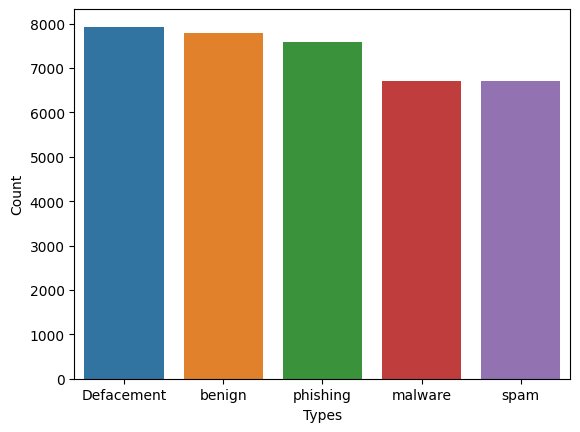

In [33]:
y = df['URL_Type_obf_Type']

y_count = y.index

count = df['URL_Type_obf_Type'].value_counts()

sns.barplot(x = count.index, y = count)
plt.xlabel('Types')
plt.ylabel('Count')

#### Remove entries with NaN and inf values. They pose difficulties to decision tree models ####

In [34]:
df = df.dropna()

print(len(df))

feature_names = df.columns[:79]
print(feature_names)

18982
Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPat

#### Creation of X & y and Scaling the data ####

In [35]:
X = df.iloc[: , :79]
y = df['URL_Type_obf_Type']

class_names = y.unique()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split data into 20% testing size and 80% training size ####

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size = 0.2, random_state = 100)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

tree_gini = DecisionTreeClassifier()

tree_gini.fit(X_train, y_train)

abc = AdaBoostClassifier(base_estimator=tree_gini)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy:  0.9460100079009744


### Setup Tree Parameters ###

In [38]:
from sklearn.model_selection import GridSearchCV

tree_param = {'criterion':['gini','entropy'],
'max_depth':[1,3,6,9,12,15,18],
}
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 9, 12, 15, 18]})

### Obtain best performing model ###

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.9409285479091206
{'criterion': 'entropy', 'max_depth': 18}
DecisionTreeClassifier(criterion='entropy', max_depth=18)


### Decision Tree Accuracies without AdaBoostClassifier ####

In [40]:
print("Accuracy: ")
lst = [1, 3, 6, 9, 12, 15, 18]
for i in lst:
    tree_gini = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    tree_gini.fit(X_train, y_train)
    y_pred_gini = tree_gini.predict(X_test)
    print("Gini (Depth = ", i, "):", accuracy_score(y_test,y_pred_gini) * 100, "%")

    tree_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    tree_entropy.fit(X_train, y_train)
    y_pred_entropy = tree_entropy.predict(X_test)
    print("Entropy (Depth = ", i, "):", accuracy_score(y_test,y_pred_entropy) * 100, "%")

Accuracy: 
Gini (Depth =  1 ): 38.82012114827496 %
Entropy (Depth =  1 ): 40.479325783513296 %
Gini (Depth =  3 ): 62.812746905451675 %
Entropy (Depth =  3 ): 67.07927311035029 %
Gini (Depth =  6 ): 81.61706610481959 %
Entropy (Depth =  6 ): 84.72478272320252 %
Gini (Depth =  9 ): 89.14932841717145 %
Entropy (Depth =  9 ): 91.3352646826442 %
Gini (Depth =  12 ): 93.04714248090598 %
Entropy (Depth =  12 ): 93.88991308928101 %
Gini (Depth =  15 ): 93.81090334474585 %
Entropy (Depth =  15 ): 94.60100079009744 %
Gini (Depth =  18 ): 94.548327627074 %
Entropy (Depth =  18 ): 94.73268369765604 %


### AdaBoostClassifier with DecisionTreeClassifier as base Accuracies ###

In [41]:
depths = [1, 3, 6, 9, 12, 15, 18]
criteria = ['gini', 'entropy']

for depth in depths:
    for criterion in criteria:
        base_classifier = DecisionTreeClassifier(max_depth = depth, criterion = criterion)

        ada_classifier = AdaBoostClassifier(base_classifier, n_estimators = 50, random_state = 8)

        ada_classifier.fit(X_train, y_train)

        y_pred = ada_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred) * 100
        print(f"Depth: {depth}, Criterion: {criterion}, Accuracy: {accuracy:.2f}")


Depth: 1, Criterion: gini, Accuracy: 60.55
Depth: 1, Criterion: entropy, Accuracy: 63.89
Depth: 3, Criterion: gini, Accuracy: 77.75
Depth: 3, Criterion: entropy, Accuracy: 68.58
Depth: 6, Criterion: gini, Accuracy: 95.10
Depth: 6, Criterion: entropy, Accuracy: 94.97
Depth: 9, Criterion: gini, Accuracy: 97.34
Depth: 9, Criterion: entropy, Accuracy: 97.23
Depth: 12, Criterion: gini, Accuracy: 97.55
Depth: 12, Criterion: entropy, Accuracy: 97.66
Depth: 15, Criterion: gini, Accuracy: 97.76
Depth: 15, Criterion: entropy, Accuracy: 97.92
Depth: 18, Criterion: gini, Accuracy: 97.79
Depth: 18, Criterion: entropy, Accuracy: 96.08
